---
Build a portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 


In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Reading data from 1st stock (aapl)

# Set the file path for aapl
aapl_filepath = Path("Resources/aapl_historical.csv")

# Create a Pandas dataframe from a csv file
aapl_df = pd.read_csv(aapl_filepath)
aapl_df.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [3]:
# Clean apple data to get read for merge. First, set Date as index.

aapl_df.set_index(pd.to_datetime(aapl_df['Trade DATE'], infer_datetime_format=True), inplace=True)
aapl_df.head()

,Symbol,Trade DATE,NOCP
Trade DATE,,,
2019-05-09,AAPL,5/9/2019,200.72
2019-05-08,AAPL,5/8/2019,202.90
2019-05-07,AAPL,5/7/2019,202.86
2019-05-06,AAPL,5/6/2019,208.48
2019-05-03,AAPL,5/3/2019,211.75


In [4]:
# Delete extra Trade Date Column

aapl_df.drop(columns=['Trade DATE'], inplace=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [5]:
# Drop symbol column

aapl_df.drop(columns=['Symbol'], inplace=True)
aapl_df.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [6]:
# Replace NOCP with Ticker name (AAPL)

aapl_df = aapl_df.rename(columns={
    "NOCP": "AAPL",
})

aapl_df.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [7]:
# Reading data from 2nd stock (cost)

# Set the file path for COSTCO
cost_filepath = Path("Resources/cost_historical.csv")

# Create a Pandas dataframe from a csv file
cost_df = pd.read_csv(cost_filepath)
cost_df.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [8]:
# Clean Costco data to get ready for merge. First, set Date as index.

cost_df.set_index(pd.to_datetime(cost_df['Trade DATE'], infer_datetime_format=True), inplace=True)
cost_df.head()

,Symbol,Trade DATE,NOCP
Trade DATE,,,
2019-05-09,COST,5/9/2019,243.47
2019-05-08,COST,5/8/2019,241.34
2019-05-07,COST,5/7/2019,240.18
2019-05-06,COST,5/6/2019,244.23
2019-05-03,COST,5/3/2019,244.62


In [9]:
# Delete extra Trade Date Column

cost_df.drop(columns=['Trade DATE'], inplace=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [10]:
# Drop symbol column

cost_df.drop(columns=['Symbol'], inplace=True)
cost_df.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [11]:
# Replace NOCP with Ticker name (COST)

cost_df = cost_df.rename(columns={
    "NOCP": "COST",
})

cost_df.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [12]:
# Reading data from 3rd stock (GOOGLE)

# Set the file path for GOOGLE
goog_filepath = Path("Resources/goog_historical.csv")

# Create a Pandas dataframe from a csv file
goog_df = pd.read_csv(goog_filepath)
goog_df.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [13]:
# Clean Costco data to get ready for merge. First, set Date as index.

goog_df.set_index(pd.to_datetime(goog_df['Trade DATE'], infer_datetime_format=True), inplace=True)
goog_df.head()

,Symbol,Trade DATE,NOCP
Trade DATE,,,
2019-05-09,GOOG,5/9/2019,1162.38
2019-05-08,GOOG,5/8/2019,1166.27
2019-05-07,GOOG,5/7/2019,1174.10
2019-05-06,GOOG,5/6/2019,1189.39
2019-05-03,GOOG,5/3/2019,1185.40


In [14]:
# Delete extra Trade Date Column

goog_df.drop(columns=['Trade DATE'], inplace=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [15]:
# Drop symbol column

goog_df.drop(columns=['Symbol'], inplace=True)
goog_df.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [16]:
# Replace NOCP with Ticker name (COST)

goog_df = goog_df.rename(columns={
    "NOCP": "GOOG",
})

goog_df.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [17]:
# Combine all stocks in a single DataFrame


stocks_df = pd.concat([aapl_df, cost_df, goog_df], axis="columns", join="inner")
stocks_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [18]:
# Calculate daily returns

daily_returns = stocks_df.pct_change()
daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355


In [19]:
# Drop NAs

daily_returns = daily_returns.dropna().copy()
daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226


In [20]:
# Set weights

weights = [1/3, 1/3, 1/3]

aapl_weight = 0.33
cost_weight = 0.33
goog_weight = 0.33

# Calculate portfolio return

weights = [0.33, 0.33, 0.33]
portfolio_returns = daily_returns.dot(weights)

# Display sample data

portfolio_returns.head()

Trade DATE
2019-05-08    0.001801
2019-05-07    0.000564
2019-05-06    0.019004
2019-05-03    0.004596
2019-05-02   -0.013000
dtype: float64

In [21]:
# Join your returns DataFrame to the original returns DataFrame

total_df = pd.concat([daily_returns, portfolio_returns], axis="columns", join="inner")
total_df.head()

,AAPL,COST,GOOG,0
Trade DATE,,,,
2019-05-08,0.010861,-0.008749,0.003347,0.001801
2019-05-07,-0.000197,-0.004806,0.006714,0.000564
2019-05-06,0.027704,0.016862,0.013023,0.019004
2019-05-03,0.015685,0.001597,-0.003355,0.004596
2019-05-02,-0.012279,-0.007890,-0.019226,-0.013000


In [22]:
#Check for Nulls

total_df.isnull().mean() * 100

AAPL    0.0
COST    0.0
GOOG    0.0
0       0.0
dtype: float64

In [23]:
# No nulls, move on
# Calculate the daily `std`, then annualized std

daily_std = total_df.std()
daily_std.head()

AAPL    0.018923
COST    0.013439
GOOG    0.016714
0       0.013229
dtype: float64

In [24]:
# Calculate annualized std

annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

AAPL    0.300387
COST    0.213344
GOOG    0.265322
0       0.210010
dtype: float64

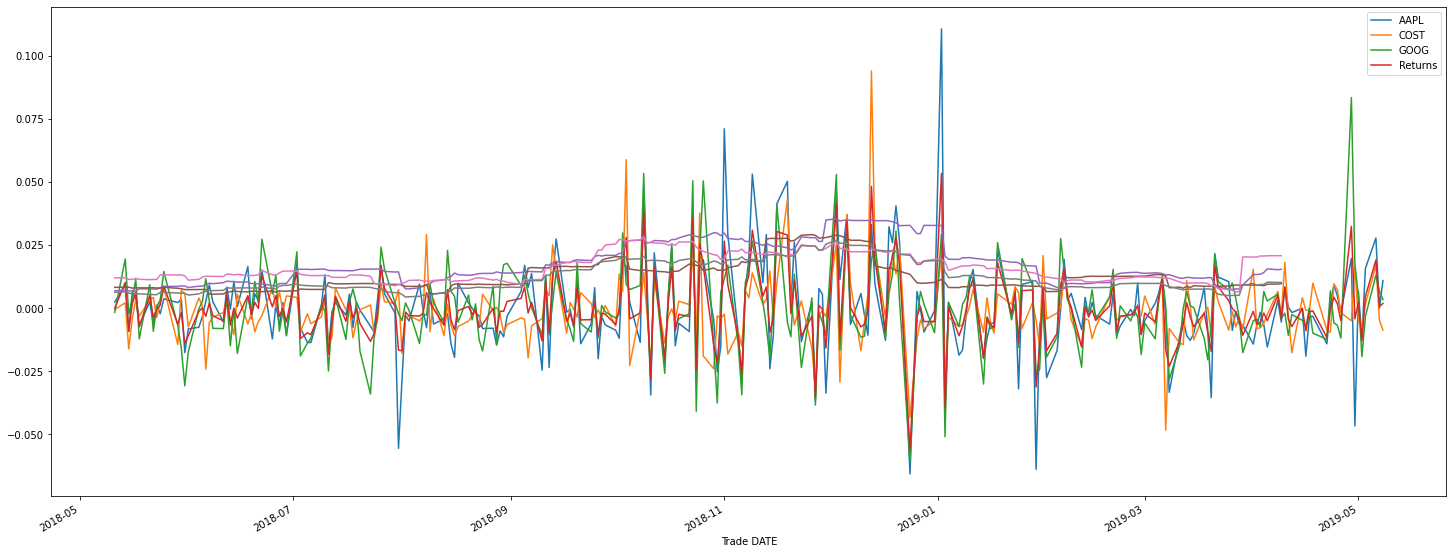

In [25]:
# Calculate and print rolling standard deviation (21 days)

total_df.rolling(window=21).std()

ax = total_df.plot(figsize=(25,10))
total_df.rolling(window=21).std().plot(ax=ax)
ax.legend(["AAPL", "COST", "GOOG", "Returns"]);

In [26]:
# Calculate the correlation

correlation = total_df.corr()
correlation

,AAPL,COST,GOOG,0
AAPL,1.000000,0.413964,0.648156,0.881018
COST,0.413964,1.000000,0.375228,0.687074
GOOG,0.648156,0.375228,1.000000,0.848645
0,0.881018,0.687074,0.848645,1.000000


<AxesSubplot:>

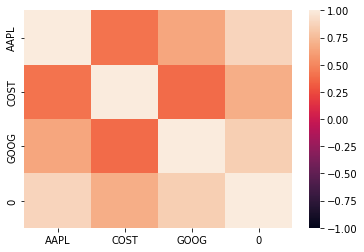

In [27]:
# Plot the correlation

sns.heatmap(correlation, vmin=-1, vmax=1)

In [28]:
# Get S&P 500 data ready to find beta

# Set the file path for s&p500 history

sp500_file_path = Path("Resources/sp500_history.csv")

# Create a Pandas dataframe from a csv file

sp500_df = pd.read_csv(sp500_file_path)

# Cleaning Data (index = Date)

sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)

# Delete extra Trade Date Column

sp500_df.drop(columns=['Date'], inplace=True)

#Change name of Close to S&P 500

sp500_df = sp500_df.rename(columns={
    "Close": "S&P 500",
})

#Changing the "$" dataframe to numeric

sp500_df["S&P 500"] = sp500_df["S&P 500"].str.replace("$", "", regex = True)

#Convert `Close` column from object to float

sp500_df["S&P 500"] = sp500_df["S&P 500"].astype("float")

# Daily returns for sp500

sp500daily_returns = sp500_df.pct_change()
sp500daily_returns.head()


,S&P 500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [29]:
# Calculate covariance of S&P 500 vs Returns

covariance = total_df[0].cov(sp500daily_returns['S&P 500'])
covariance

0.00011083154865499447

In [30]:
# Calculate variance of S&P 500 vs Returns

variance = sp500daily_returns['S&P 500'].var()
variance

6.617241051948298e-05

In [31]:
# Calculate beta of S&P 500 vs Returns

return_beta = covariance / variance
return_beta

1.6748906044817968

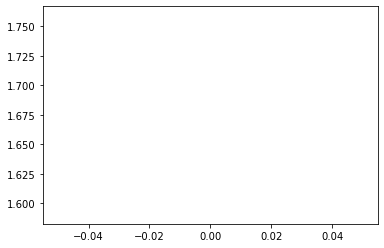

In [40]:
#Plot the beta

plt.plot(return_beta)
plt.show()

In [33]:
# Calculate Sharpe Ratio using daily values

sharpe_ratios = ((total_df.mean()-total_df[0].mean()) * 252) / (total_df.std() * np.sqrt(252))
sharpe_ratios

AAPL    0.201229
COST   -0.559130
GOOG    0.212748
0       0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

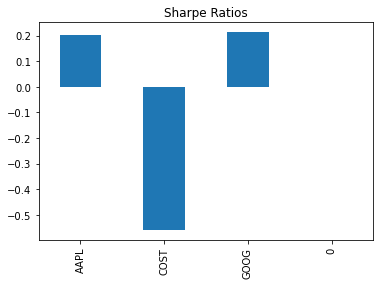

In [34]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [41]:
# How did your portfolio do?

print(f"With a beta of 1.67, my portfolio is considered somewhat volatile compared to the S&P 500 and did not perform at the balanced level of the S&P 500. Both Apple and Google out performed the S&P500 but costco did not. With a change in weights of the stocks, this portfolio could have done much better.")

With a beta of 1.67, my portfolio is considered somewhat volatile compared to the S&P 500 and did not perform at the balanced level of the S&P 500. Both Apple and Google out performed the S&P500 but costco did not. With a change in weights of the stocks, this portfolio could have done much better.
